In [1]:
import numpy as np
import joblib
import os
import pandas as pd

# 使用网格搜索方法来进行参数选择
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder

from collections import Counter
# 使用StratifiedShuffleSplit类进行分层抽样
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE, KMeansSMOTE
from data_process.light_curve import ASASLightCurve

# 使用StratifiedShuffleSplit类进行分层抽样
from sklearn.model_selection import train_test_split

In [2]:
demo_EB = np.load("../dataset/light_curve_instance/eclipsing_binary/demo_EB.npy",
                                allow_pickle=True)

In [15]:
from matplotlib import pyplot as plt

EA, EB, EW,ELL = [],[],[],[],

for lc in demo_EB:
    if EA and EB and EW and ELL:
        break
    if lc.meta["class_probability"] > 0.8:
        if lc.meta["variable_type"] == "EA":
            EA.append(lc)
        elif lc.meta["variable_type"] == "EB":
            EB.append(lc)
        elif lc.meta["variable_type"] == "EW":
            EW.append(lc)
        elif lc.meta["variable_type"] == "ELL":
            ELL.append(lc)
    else:
        continue

38 155


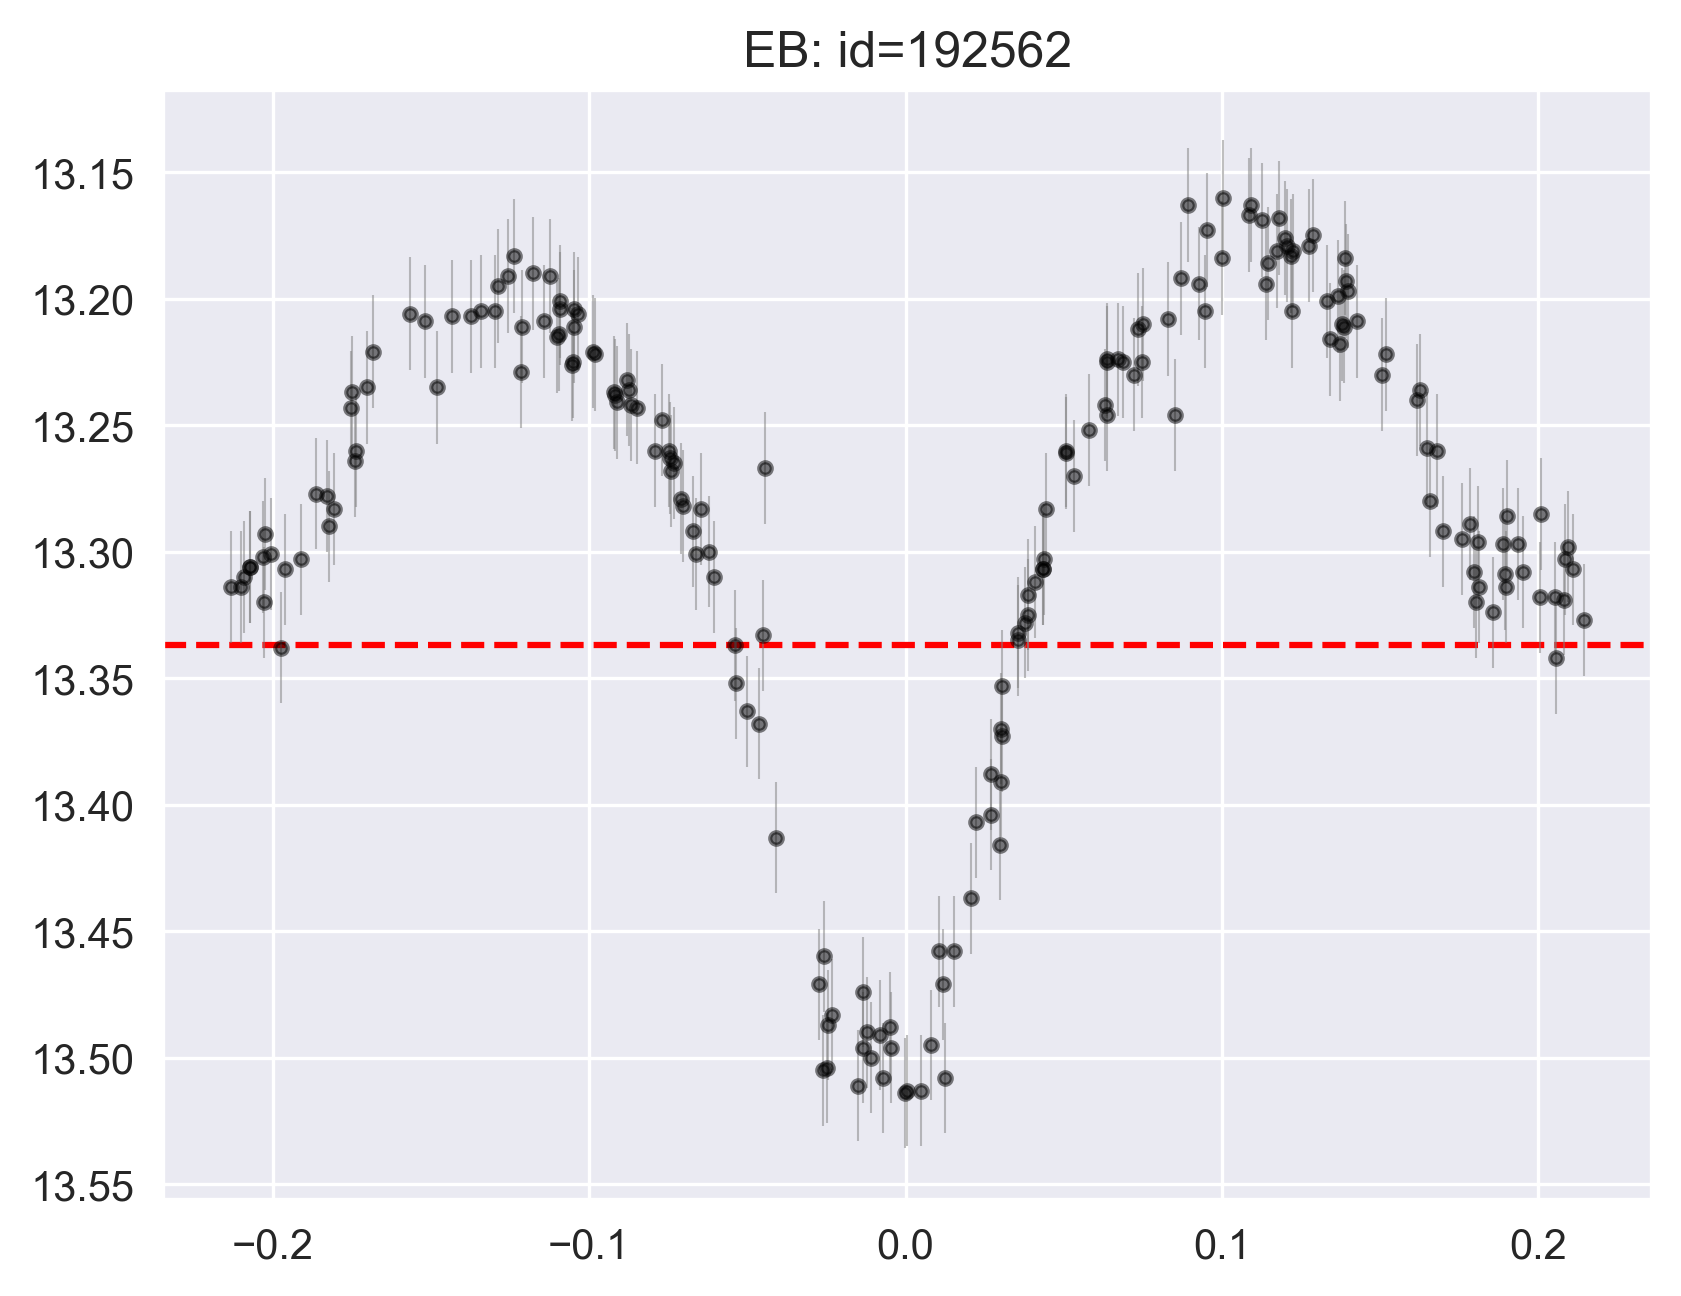

In [19]:
lc = EB[2]
time = lc.time.value
flux = lc.flux.value
flux_err = lc.flux_err.value
period = lc.meta["period"]

median_mag = (np.max(flux) + np.min(flux)) / 2

print(len(flux[flux > median_mag]), len(
            flux[flux < median_mag]))

fig,ax = plt.subplots(dpi=300)
plt.axhline(median_mag,color='r',linestyle='--')
plt.errorbar(time, flux, yerr=flux_err, fmt='.', ecolor='gray', color='black', elinewidth=0.5, capsize=0,alpha=0.5)
ax.invert_yaxis()
plt.title(lc.meta["variable_type"]+": id="+ lc.meta["source_id"])
plt.show()